# Homework 2: Arrays,  File I/O, Formatting, and Plotting

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary.  Please rename the notebook as SIS ID_HW03.ipynb (your student ID number) and save the notebook once you have executed it as a PDF  (note, that when saving as PDF you don't want to use the option with latex because it crashes, but rather the one to save it directly as a PDF). 

**The homework should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files). Please label it by your student ID number (SIS ID)**

## Problem 1: Sunspots

[Adapted from Newman, Exercise 3.1] At <a href="http://www-personal.umich.edu/~mejn/computational-physics/sunspots.txt">this link</a>, you will find a file called `sunspots.txt`, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot number.

a. Write a program that reads in the data and makes a graph of sunspots as a function of time. Adjust the $x$ axis so that the data fills the whole horizontal width of the graph.

b. Modify your code to display two subplots in a single figure: The plot from Part 1 with all the data, and a second subplot with the first 1000 data points on the graph.

c. Write a function `running_average(y, r)` that takes an array or list $y$ and calculates the running average of the data, defined by 
$$ Y_k = \frac{1}{2r+1} \sum_{m=-r}^r y_{k+m},$$
where $y_k$ are the sunspot numbers in our case. Use this function and modify your second subplot (the one with the first 1000 data points) to plot both the original data and the running average on the same graph, again over the range covered by the first 1000 data points. Use $r=5$, but make sure your program allows the user to easily change $r$.

The next two parts may require you to google for how to do things. Make a strong effort to do these parts on your own without asking for help. If you do ask for help from a GSI or friend, first ask them to point you to the resource they used, and do your best to learn the necessary techniques from that resource yourself. Finding and learning from online documentation and forums is a very important skill. (Hint: Stack Exchange/Stack Overflow is often a great resource.)

d. Add legends to each of your subplots, but make them partially transparent, so that you can still see any data that they might overlap. *Note: In your program, you should only have to change $r$ for the running average in one place to adjust both the graph and the legend.*

e. Since the $x$ and $y$ axes in both subplots have the same units, add shared $x$ and $y$ labels to your plot that are centered on the horizontal and vertical dimensions of your figure, respectively. Also add a single title to your figure.

When your are finished, your plot should look something close to this:


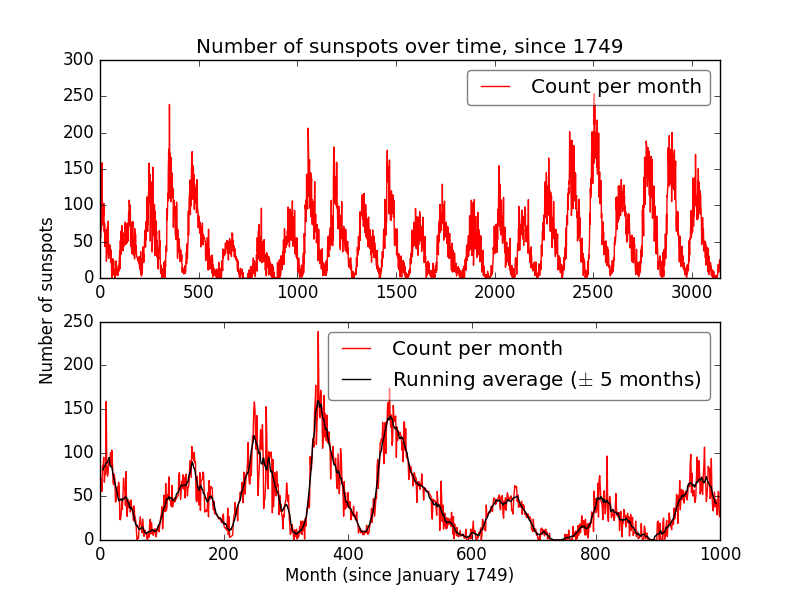

#### Hints

* The running average is not defined for the first and last few points that you're taking a running average over. (Why is that?) Notice, for instance, that the black curve in the plot above doesn't extend quite as far on either side as the red curve. For making your plot, it might be helpful if your `running_average` function returns an array of the $x$-values $x_k$ (or their corresponding indices $k$) along with an array of the $y$-values $Y_k$ that you compute for the running average.

* You can use the Latex code `$\pm$` for the $\pm$ symbol in the legend. You can also just write `+/-` if you prefer.


## Solution to Problem 1

In [ ]:
## develop your solution here

## Problem 2 ASCII File Processing

In this problem, we will process information in a txt file, named "signal_background.txt". 

If you run `%cat signal_background.txt`, the printout of the file would look something like (actual numbers may differ) -


signal: 31.982  background: 4361.6 <br>
signal: 72.536  background: 8782.6 <br>
signal: 12.706  background: 1565.4 <br>
signal: 77.107  background: 9732.4 <br>
signal: 155.246  background: 13427.6 <br>

The first value (after `signal:`) is the signal yield $s$, and the second value (after `background:`) is the background yield $b$. The quantity $Z$, also known as the significance, is defined as $Z = \frac{s}{\sqrt{b}}$. 

We want to reformat the file so that we can create a LATEX table that contains the signal and background, as well as the significance. The desirable appearance of this LATEX table would look like - 

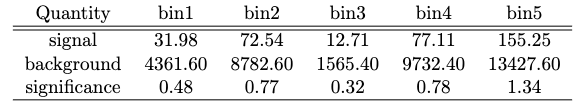
There six columns: a title column which is used to indicate the name of the quantity (signal, background, or significance), five columns with names of bin1, bin2, ..., bin5. Each `bin` is corresponding to a line in the original txt file of `signal_background.txt`. 

In latex, a row of numbers of a, b, c would have the following syntax:

                a & b & c \\\
before compilation. The `&` symbol delimit columns, i.e., the above example has three columns. The double backslash ` \\\` at the end of the line indicates the return of the line, i.e., it is the LATEX equivalent of `'\n'`.

To create the table as shown in the above snapshot, you would read the signal and background yields from `signal_background.txt`, calculate significance using  $Z = \frac{s}{\sqrt{b}}$, tabulate these numbers in the following format:

    signal & x & x & x & x & x \\\ 
    background & x & x & x & x & x \\\ 
    significance & x & x & x & x & x \\\ 

in your result, `x` should be the actual signal and background yields read from the txt file. Your script should be able to create at least the three lines above, with actual numbers. For example, something like -

    signal & 31.98&72.54&12.71&77.11&155.25\\ 
    background & 4361.60&8782.60&1565.40&9732.40&13427.60\\ 
    significance & 0.48&0.77&0.32&0.78&1.34\\ 

Then, you should copy these lines to a TEX editor and generate a table. The easiest solution is to create a table on Overleaf https://www.overleaf.com/project, where you can create a free account with your berkeley.edu email. A demo on how to produce the table with Overleaf will be given on Monday, September 19 during the lecture. If you have no prior experience with LATEX, don't worry! It is very simple! The Overleaf interface also makes it extremely user friendly. You can read about LATEX table creation here https://www.overleaf.com/learn/latex/Tables    

You must turn in the code that creates the LATEX-format table as well as a snapshot of the compiled Table. 

This problem has two parts. The numbers in these tables must have *exactly two* digits after the decimal point, i.e., an entry of 1.563423 is not acceptable, and you must convert it to 1.56.

### part 1) 
In this part, the txt file is open with Python method `open`, i.e., f = open('signal_background.txt','w'). Then, you would read the file line by line, use list and string methods to retrieve the signal and background yields, calculate the significance, and format the output. 


* #### Additional required question 
    * We will discuss more on this later this semester. For now, let's take it as a fact: the total significance of a multiple-bin measurement is the quadratic sum of the significance values in individual bins. We have:

$Z = \sqrt{\sum_{i=1}^{5}{z_i}^2}$

    * For part 1), do not use numpy array to calculate the significance
    
    
* Hints:

    * Think about how you would split the line; what would be the delimiter here? 
    * When you include a backslash to a string, you will have to do a double backslack, e.g., `\\`; similarly, when you want to include a double backslash to a string, you will have to type a triple backslash e.g., `\\\`.  

### part 2)
In this part, the txt file should be loaded to a numpy array with the `genfromtxt` method. Calculate the significance with numpy methods. *No for-loop is allowed in part 2)* The same LATEX format table should be generated. 

* #### Additional required question 
    * Calculate the total significance as defined in part 1)

    * For part 2), use numpy array to calculate the significance; do not use a for loop for this operation.

* Hints:
    * the numpy method `array2string` is helpful here. Make sure you go over possible arguments of this method.


## Solution to part 1) of Problem 2

## Solution to part 2) of Problem 2 